# Mod 3 Final Project

## Student Info

- Name: 
- Cohort: 
- Instructor:


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [29]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


Requirement already up-to-date: fsds_100719 in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.7.4)


In [2]:
from functions import Cohen_d, find_outliers_IQR,find_outliers_Z

## Uncomment the line below to see the source code for the imported functions
# fs.ihelp(Cohen_d,False),fs.ihelp(find_outliers_IQR,False), fs.ihelp(find_outliers_Z,False)

In [3]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


# HYPOTHESIS 1

> ***Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?***

- $H_0$:
- $H_1$:

# Hypothesis 2


> ***Does discount amount have a statistically significant effect on the total spent ($) on a product in an order? If so, at what level(s) of discount?***

In [11]:
cur.execute("""SELECT * from OrderDetail""")
col_names = [x[0] for x in cur.description]
df = pd.DataFrame(cur.fetchall(),columns=col_names)#, columns=['Table'])

df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [19]:
## Create 'discounted' column for groupby 
df['discounted'] = df['Discount']>0
df['discounted'] = df['discounted'].map({True:'Discounted',False:'Full Price'})
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


In [23]:
## Create TotalSpent column
df['Total Spent'] = df['UnitPrice'] * df['Quantity']
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted,total_spent,Total Spent
0,10248/11,10248,11,14.00,12,0.00,Full Price,168.0,168.0
1,10248/42,10248,42,9.80,10,0.00,Full Price,98.0,98.0
2,10248/72,10248,72,34.80,5,0.00,Full Price,174.0,174.0
3,10249/14,10249,14,18.60,9,0.00,Full Price,167.4,167.4
4,10249/51,10249,51,42.40,40,0.00,Full Price,1696.0,1696.0
...,...,...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted,66.5,66.5
2151,11077/66,11077,66,17.00,1,0.00,Full Price,17.0,17.0
2152,11077/73,11077,73,15.00,2,0.01,Discounted,30.0,30.0
2153,11077/75,11077,75,7.75,4,0.00,Full Price,31.0,31.0


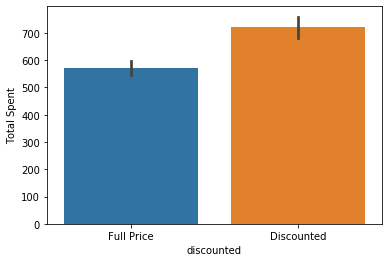

In [24]:
sns.barplot(data=df, x='discounted',y='Total Spent',ci=68)

In [27]:
grps = {}
for grp_name in df['discounted'].unique():
    grps[grp_name] = df.groupby('discounted').get_group(grp_name)['Total Spent']
    
grps

{'Full Price': 0        168.0
 1         98.0
 2        174.0
 3        167.4
 4       1696.0
          ...  
 2147      14.0
 2148      48.0
 2151      17.0
 2153      31.0
 2154      26.0
 Name: Total Spent, Length: 1317, dtype: float64, 'Discounted': 6       1484.0
 7        252.0
 8        100.8
 9        234.0
 11      2592.0
          ...  
 2144      36.0
 2146      36.0
 2149      68.0
 2150      66.5
 2152      30.0
 Name: Total Spent, Length: 838, dtype: float64}

In [ ]:
find_outliers_Z()

In [30]:
for grp_name,grp_data in grps.items():
    idx_outs = find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers using Z-score method.")
    
    

NameError: name 'np' is not defined